# **Synthetic Cattle Retina Dataset Generation**

Synthetic retina-like images for "healthy" and "diseased" classes are created using random patterns to simulate retina structures, organized into training and testing datasets, zipped, and made available for download.

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil
from google.colab import files

# Function to create synthetic retina-like images
def create_synthetic_retina_image(save_path, label, num_images=100, img_size=(224, 224)):
    os.makedirs(save_path, exist_ok=True)

    for i in tqdm(range(num_images), desc=f"Generating images for {label}"):
        img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)  # Black background

        # Draw random circular patterns to mimic retina structures
        center = (np.random.randint(50, img_size[0]-50), np.random.randint(50, img_size[1]-50))
        radius = np.random.randint(30, 50)
        color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
        thickness = np.random.randint(1, 4)

        for _ in range(5):  # Add random circular structures
            cv2.circle(img, center, radius, color, thickness)
            center = (np.random.randint(50, img_size[0]-50), np.random.randint(50, img_size[1]-50))

        # Draw random lines to simulate blood vessels
        for _ in range(10):
            pt1 = (np.random.randint(0, img_size[0]), np.random.randint(0, img_size[1]))
            pt2 = (np.random.randint(0, img_size[0]), np.random.randint(0, img_size[1]))
            line_color = (np.random.randint(100, 255), np.random.randint(100, 255), np.random.randint(100, 255))
            line_thickness = np.random.randint(1, 2)
            cv2.line(img, pt1, pt2, line_color, line_thickness)

        # Save the generated image
        file_name = f"{label}_{i+1}.jpg"
        file_path = os.path.join(save_path, file_name)
        cv2.imwrite(file_path, img)

# Create directories for dataset
dataset_path = "./synthetic_cattle_retina_dataset"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Generate images for healthy and diseased classes
classes = ["healthy", "diseased"]
for cls in classes:
    create_synthetic_retina_image(os.path.join(train_path, cls), cls, num_images=100)
    create_synthetic_retina_image(os.path.join(test_path, cls), cls, num_images=20)

print(f"Synthetic dataset generated at: {os.path.abspath(dataset_path)}")

# Zip the dataset for easy upload
shutil.make_archive("synthetic_cattle_retina_dataset", 'zip', dataset_path)

# Download the zipped dataset
files.download("synthetic_cattle_retina_dataset.zip")


Generating images for diseased: 100%|██████████| 20/20 [00:00<00:00, 747.51it/s]


Synthetic dataset generated at: /content/synthetic_cattle_retina_dataset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **# Merging Datasets and Preparing for Training**


1.  Google Drive Mounted
2.   Paths Verified
3. Folder Created






In [ ]:
from google.colab import drive
import os
from tensorflow.keras.preprocessing import image
import shutil
from sklearn.model_selection import train_test_split

# Mount Google Drive to access datasets
drive.mount('/content/drive')

# Paths for the datasets
synthetic_data_path = '/content/synthetic_cattle_retina_dataset'
sample_data_path = '/content/drive/MyDrive/sample'

# Verify the paths
print("Synthetic Data Path:", synthetic_data_path)
print("Sample Data Path:", sample_data_path)

# Create a new folder to store merged images
merged_data_path = '/content/merged_dataset'
os.makedirs(merged_data_path, exist_ok=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Synthetic Data Path: /content/synthetic_cattle_retina_dataset
Sample Data Path: /content/drive/MyDrive/sample


# **Display Sample Images from Healthy and Diseased Classes**

The code filters and displays a specified number of images labeled as 'healthy' and 'diseased' from the dataset, converting them to RGB and visualizing them with labels for inspection.

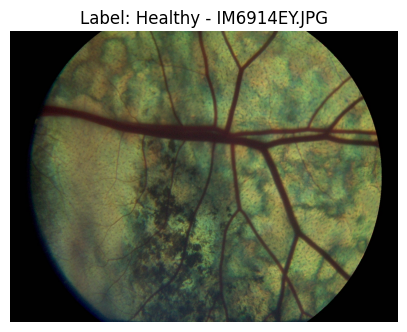

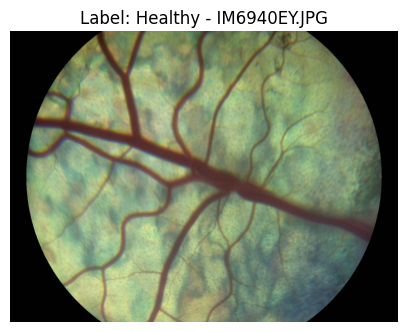

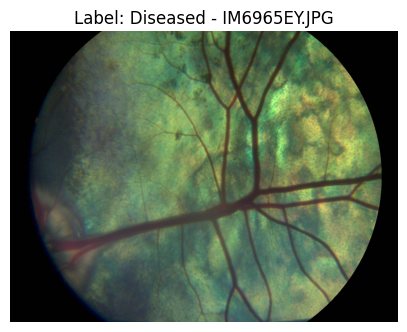

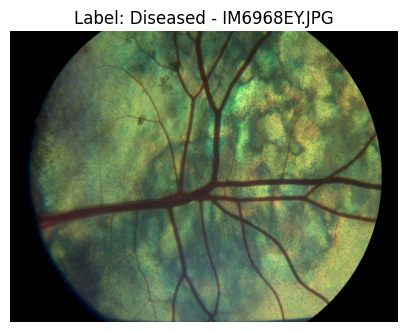

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the sample folder in the dataset
dataset_path = "/content/merged_dataset"

# Function to load and display 2 images from both 'healthy' and 'diseased' classes in the 'sample' folder
def display_images_from_sample(dataset_path, healthy_num=2, diseased_num=2):
    # Path to 'healthy' and 'diseased' classes within the 'sample' folder
    healthy_sample_folder = os.path.join(dataset_path, "healthy")
    diseased_sample_folder = os.path.join(dataset_path,  "unhealthy")

    # List all images in both directories
    healthy_images = os.listdir(healthy_sample_folder)
    diseased_images = os.listdir(diseased_sample_folder)

    # Filter images that start with 'IM'
    healthy_images = [img for img in healthy_images if img.startswith('IM') and img.endswith('.JPG')]
    diseased_images = [img for img in diseased_images if img.startswith('IM') and img.endswith('.JPG')]

    # Display 'healthy_num' images from the 'healthy' class in the 'sample' folder
    for i in range(min(healthy_num, len(healthy_images))):
        img_name = healthy_images[i]
        img_path = os.path.join(healthy_sample_folder, img_name)

        # Read and display the image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib

        # Display the image with its label
        plt.figure(figsize=(5, 5))
        plt.imshow(img_rgb)
        plt.title(f"Label: Healthy - {img_name}")
        plt.axis('off')
        plt.show()

    # Display 'diseased_num' images from the 'diseased' class in the 'sample' folder
    for i in range(min(diseased_num, len(diseased_images))):
        img_name = diseased_images[i]
        img_path = os.path.join(diseased_sample_folder, img_name)

        # Read and display the image
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib

        # Display the image with its label
        plt.figure(figsize=(5, 5))
        plt.imshow(img_rgb)
        plt.title(f"Label: Diseased - {img_name}")
        plt.axis('off')
        plt.show()

# Display 2 images from the 'healthy' class and 2 images from the 'diseased' class in the 'sample' folder
display_images_from_sample(dataset_path, healthy_num=2, diseased_num=2)


# **Merging Healthy and Unhealthy Datasets**

The code organizes and merges images from synthetic and sample datasets into unified 'healthy' and 'unhealthy' directories for streamlined analysis and training.

In [ ]:
# Paths for healthy and unhealthy classes
healthy_path = os.path.join(merged_data_path, 'healthy')
unhealthy_path = os.path.join(merged_data_path, 'unhealthy')
os.makedirs(healthy_path, exist_ok=True)
os.makedirs(unhealthy_path, exist_ok=True)

# Copy images from the synthetic dataset
for label in ['healthy', 'diseased']:  # 'diseased' will be 'unhealthy'
    src = os.path.join(synthetic_data_path, 'train', label)
    dest = healthy_path if label == 'healthy' else unhealthy_path
    for file_name in os.listdir(src):
        shutil.copy(os.path.join(src, file_name), dest)

# Copy images from the sample dataset
for label in ['healthy', 'unhealthy']:  # Labels in 'sample' dataset
    src = os.path.join(sample_data_path, label)
    dest = healthy_path if label == 'healthy' else unhealthy_path
    for file_name in os.listdir(src):
        shutil.copy(os.path.join(src, file_name), dest)

print("Datasets merged successfully!")


Datasets merged successfully!


# **Merging Synthetic and Sample Retina Datasets**

The code consolidates 'healthy' and 'unhealthy' images from synthetic and sample datasets into a unified structure, ensuring the 'merged_data' folder is properly organized for subsequent processing or analysis.

In [ ]:

# Define the paths for the datasets
merged_data_path = "./merged_data"
synthetic_data_path = "./synthetic_cattle_retina_dataset"
sample_data_path = "./sample_data"

# Define the paths for healthy and unhealthy subdirectories
healthy_path = os.path.join(merged_data_path, 'healthy')
unhealthy_path = os.path.join(merged_data_path, 'unhealthy')

# Create the merged_data directory and its subdirectories if they don't exist
os.makedirs(healthy_path, exist_ok=True)
os.makedirs(unhealthy_path, exist_ok=True)

# Function to copy images from one directory to another
def copy_images(src, dest):
    if os.path.exists(src):
        for file_name in os.listdir(src):
            src_file = os.path.join(src, file_name)
            if os.path.isfile(src_file):
                shutil.copy(src_file, dest)
                print(f"Copied: {src_file}")
    else:
        print(f"Source directory does not exist: {src}")

# Copy images from the synthetic dataset (train) to merged_data
for label in ['healthy', 'diseased']:  # 'diseased' will be 'unhealthy'
    src = os.path.join(synthetic_data_path, 'train', label)
    dest = healthy_path if label == 'healthy' else unhealthy_path
    copy_images(src, dest)

# Copy images from the sample dataset (train) to merged_data
for label in ['healthy', 'unhealthy']:  # Labels in 'sample' dataset
    src = os.path.join(sample_data_path, label)
    dest = healthy_path if label == 'healthy' else unhealthy_path
    copy_images(src, dest)

print("Datasets merged successfully!")

Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_47.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_87.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_88.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_16.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_81.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_51.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_98.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_85.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_10.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_23.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_92.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_4.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_13.jpg
Copied: ./synthetic_cattle_retina_dataset/train/healthy/healthy_12.jpg
Copied:

# **Splitting Merged Dataset into Train and Test Sets  **

Organizes a merged dataset by performing an 80/20 stratified train-test split on 'healthy' and 'unhealthy' labeled images, ensuring balanced label distribution in both sets, and saves the data in structured directories for training and testing.

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths for the merged dataset and the split dataset
merged_data_path = "./merged_data"
train_data_path = "./train"
test_data_path = "./test"

# Create the 'train' and 'test' directories
os.makedirs(train_data_path, exist_ok=True)
os.makedirs(test_data_path, exist_ok=True)

# Define the directories for healthy and unhealthy labels
healthy_path = os.path.join(merged_data_path, 'healthy')
unhealthy_path = os.path.join(merged_data_path, 'unhealthy')

# Get all image file paths and labels
image_paths = []
labels = []

# Collect images and labels from both healthy and unhealthy folders
for label in ['healthy', 'unhealthy']:
    label_path = os.path.join(merged_data_path, label)
    for file_name in os.listdir(label_path):
        image_paths.append(os.path.join(label_path, file_name))
        labels.append(label)

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, stratify=labels)

# Function to copy images into the respective train/test directories
def copy_images_to_split(X, y, split_type):
    for img_path, label in zip(X, y):
        # Create the destination folder based on split type (train/test)
        label_folder = os.path.join(split_type, label)
        os.makedirs(label_folder, exist_ok=True)

        # Copy the image to the appropriate folder
        shutil.copy(img_path, label_folder)

# Copy training images
copy_images_to_split(X_train, y_train, train_data_path)

# Copy testing images
copy_images_to_split(X_test, y_test, test_data_path)

print(f"Train and test datasets created successfully!")
print(f"Training set: {len(X_train)} images, Testing set: {len(X_test)} images")


Train and test datasets created successfully!
Training set: 160 images, Testing set: 40 images


# **Setting Up Image Generators for Augmented Training and Testing  **

The script initializes `ImageDataGenerator` for both training and testing datasets. It applies data augmentation techniques such as rotation, shift, shear, zoom, and flip for the training data, while the test data is only rescaled. The images are then fed in batches of 32, resized to 224x224, and prepared for binary classification (healthy vs unhealthy).

In [ ]:
train_dir = "./train"
test_dir = "./test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images by 20 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by 20%
    height_shift_range=0.2,      # Randomly shift images vertically by 20%
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Randomly zoom images by 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill in missing pixels after transformations
)

# Test data without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale the images

# Flow training images in batches from the training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,                  # Path to training directory
    target_size=img_size,       # Resize images to 224x224
    batch_size=batch_size,      # Batch size of 32
    class_mode='binary'         # Binary classification (healthy vs unhealthy)
)

# Flow test images in batches from the testing directory
test_generator = test_datagen.flow_from_directory(
    test_dir,                   # Path to testing directory
    target_size=img_size,       # Resize images to 224x224
    batch_size=batch_size,      # Batch size of 32
    class_mode='binary'         # Binary classification
)


Found 198 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


# **Print class Distribution**

In [ ]:
print(f"Class distribution in train generator: {train_generator.class_indices}")
print(f"Class distribution in test generator: {test_generator.class_indices}")


Class distribution in train generator: {'healthy': 0, 'unhealthy': 1}
Class distribution in test generator: {'healthy': 0, 'unhealthy': 1}


# **Building a VGG16-based Model for Binary Classification**

 This code loads the pre-trained VGG16 model (without the fully connected layers), freezes its weights, and adds custom layers for binary classification. The model consists of a flatten layer, a dense layer with 128 units, a dropout layer for regularization, and a final output layer with a sigmoid activation function. It is then compiled with the Adam optimizer and binary cross-entropy loss. The model's architecture is displayed using `model.summary()`.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so they are not updated during training
base_model.trainable = False

# Add custom layers on top of VGG16 model
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
x = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Create the final model using the functional API
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

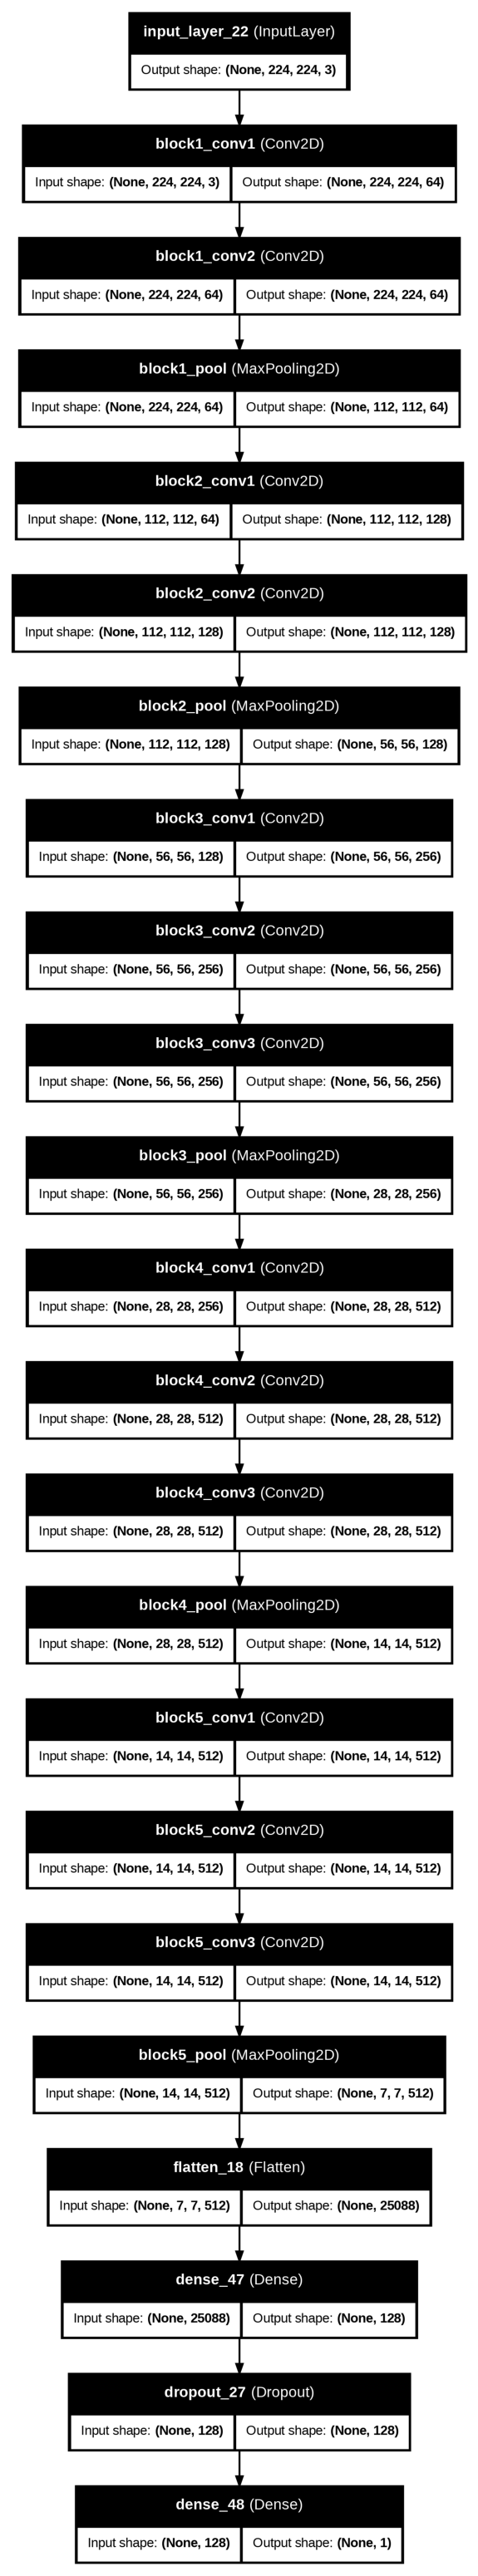

In [ ]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Save the model architecture as an image
model_image_path = 'model_architecture.png'
plot_model(model, to_file=model_image_path, show_shapes=True, show_layer_names=True)

# Display the saved model image with a larger size
img = mpimg.imread(model_image_path)

# Create a larger figure to display the image
plt.figure(figsize=(40, 40))  # Adjust the size to make the image larger
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# **Training the VGG16 Model**

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    verbose=10  # Suppress output (no progress bar or history details)
)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


# **TRAINING ACCURACY**

In [ ]:
# Access the accuracy and loss values from training
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Access validation accuracy and loss
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Print the last training and validation accuracy
print(f"Final Training Accuracy: {train_accuracy[-1]}")
print(f"Final Validation Accuracy: {val_accuracy[-1]}")


Final Training Accuracy: 0.4898989796638489
Final Validation Accuracy: 0.5247524976730347


# **TEXTING ACCURACY**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5005 - loss: 0.6964 
Test Accuracy: 0.52


# **CONFUSION MATRIX**

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


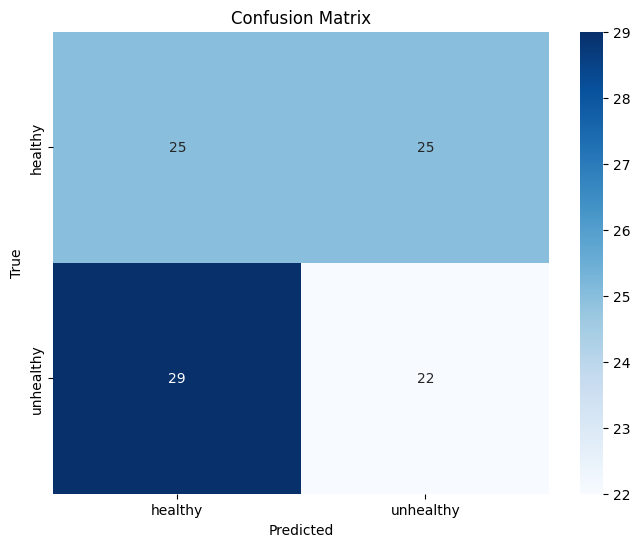

Confusion Matrix:
[[25 25]
 [29 22]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Make predictions on the test data
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Step 2: Get true labels from the test generator
y_true = test_generator.classes  # Ground truth labels

# Step 3: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, print the confusion matrix values
print("Confusion Matrix:")
print(cm)


CLASSIFICATION, PRECISION, RECALL, AUC

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.4922 - loss: 0.6939
Training Accuracy: 48.48%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5005 - loss: 0.6940 
Testing Accuracy: 52.48%
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Classification Report:
              precision    recall  f1-score   support

     healthy       0.43      0.46      0.44        50
   unhealthy       0.43      0.39      0.41        51

    accuracy                           0.43       101
   macro avg       0.43      0.43      0.43       101
weighted avg       0.43      0.43      0.43       101

Precision: 0.43
Recall: 0.39


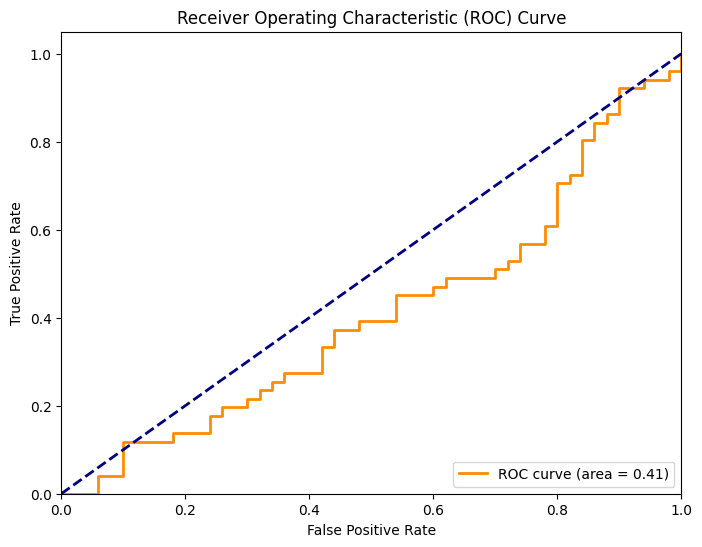

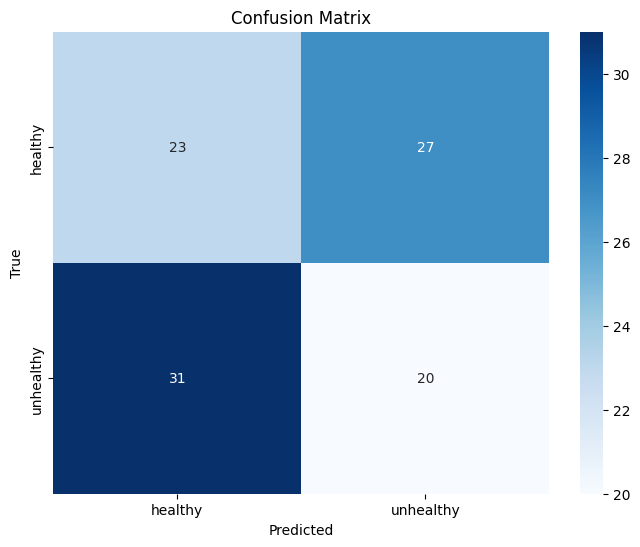

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, precision_score, recall_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import accuracy_score

# Step 1: Evaluate on Training Data
train_loss, train_acc = model.evaluate(train_generator)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Step 2: Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

# Step 3: Make Predictions on Test Data
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Step 4: Get True Labels from Test Generator
y_true = test_generator.classes  # True labels

# Step 5: Generate Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Step 6: Precision, Recall, and F1-Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Step 7: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 8: Display Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


GRAD CAM

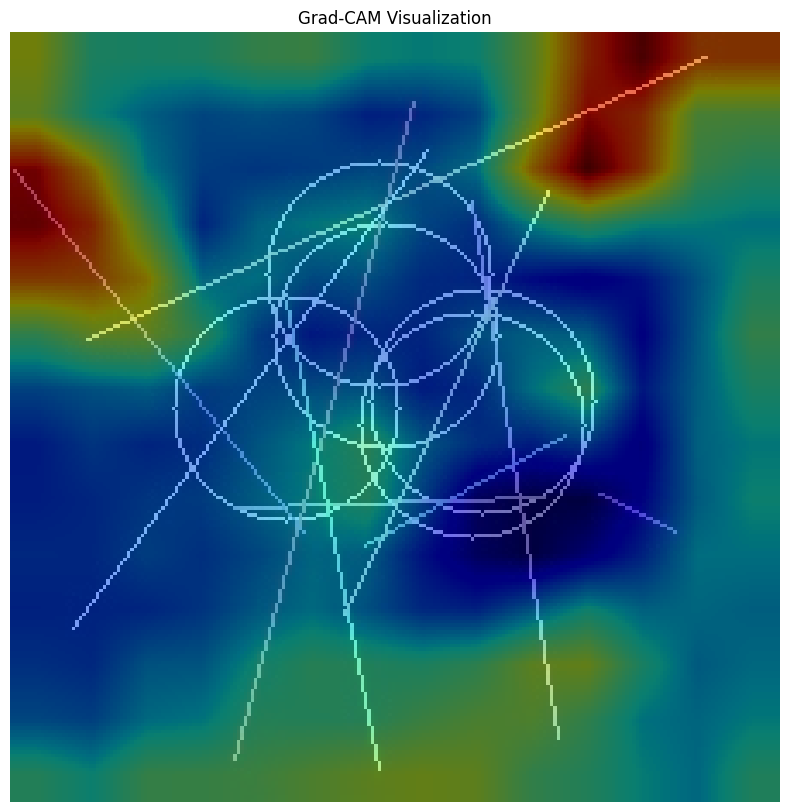

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Grad-CAM function
def grad_cam(input_model, image, layer_name):
    # Convert the image to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    image_tensor = tf.expand_dims(image_tensor, axis=0)  # Add batch dimension

    # Call the model once to initialize it properly
    _ = input_model(image_tensor)  # A single forward pass to initialize the model

    # Access the desired layer
    conv_layer = input_model.get_layer(layer_name)

    # Create a model that outputs the selected layer and the final prediction
    grad_model = tf.keras.models.Model(
        inputs=[input_model.input],
        outputs=[conv_layer.output, input_model.output]
    )

    # Perform a forward pass to get the outputs
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)  # Watch the input image tensor for gradients
        conv_output, predictions = grad_model(image_tensor)  # Get conv layer output and final predictions

        # Binary classification: Use the first class prediction as the loss
        loss = predictions[:, 0]  # Loss based on the first class prediction

    # Compute the gradients of the loss with respect to the convolutional layer output
    grads = tape.gradient(loss, conv_output)  # Compute the gradient of the loss

    # Compute the mean of the gradients across all axes (height, width, channels)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the conv output by the corresponding weight from the pooled gradients
    conv_output = conv_output[0]
    cam = np.dot(conv_output, pooled_grads.numpy())

    # Normalize the Grad-CAM heatmap to [0, 1]
    cam = np.maximum(cam, 0)  # Apply ReLU to remove negative values
    cam = cam / cam.max() if cam.max() != 0 else cam  # Normalize the heatmap

    return cam

# Path to a sample image (update this path with an actual test image)
sample_image_path = "/content/test/healthy/healthy_10.jpg"

# Load and preprocess the sample image
sample_image = cv2.imread(sample_image_path)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
sample_image_resized = cv2.resize(sample_image, (224, 224))  # Resize to model's input size
sample_image_normalized = sample_image_resized / 255.0  # Normalize pixel values

# Generate Grad-CAM heatmap using the chosen layer
cam = grad_cam(model, sample_image_normalized, 'block5_conv3')  # Use the 'conv2d_56' layer
cam_resized = cv2.resize(cam, (224, 224))  # Resize Grad-CAM to match image size

# Visualize Grad-CAM overlay
plt.figure(figsize=(10, 10))
plt.imshow(sample_image_resized)  # Display the original image
plt.imshow(cam_resized, cmap='jet', alpha=0.5)  # Overlay Grad-CAM heatmap with transparency
plt.title("Grad-CAM Visualization")
plt.axis('off')  # Remove axis for clean visualization
plt.show()
